# Task

Project: Predicting House Prices with a Regression Model
Objective: Create a model that predicts house prices based on various features.

1 Data collection:
 * Use the popular "California Housing dataset" available in the sklearn.datasets module.
 * Alternatively, you can use another dataset, such as the "House Prices: Advanced Regression Techniques" dataset from Kaggle.

2 Data exploration:
 * Analyze the data by calculating basic statistics, identifying missing values, and visualizing the distribution of the features.

3 Data preprocessing:
 * Handle missing values using techniques such as imputation or removal.
 * Perform feature scaling to ensure that all features are on the same scale.
 * Split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection.

4 Model selection and training:
 * Select a regression model, such as linear regression, ridge regression, or LASSO.
 * You can also experiment with more advanced models like decision trees or random forests.
 * Train the model using the training data.

5 Model evaluation:
 * Calculate the mean squared error (MSE), root mean squared error (RMSE), and R-squared score using sklearn.metrics.
 * Use cross-validation to check the model's performance on different subsets of the data.

6 Model tuning:
 * Fine-tune the model's hyperparameters using techniques like grid search or random search from sklearn.model_selection.
 * Re-evaluate the model's performance after tuning the hyperparameters.

7 Results visualization:
 * Create plots to visualize the relationship between the actual house prices and the predicted house prices.
 * Identify features that have the most significant impact on the house prices.

8 Documentation and presentation:
 * Write a brief report outlining your project, its objectives, the methodology used, and the results obtained.
 * Prepare a presentation or demo to showcase your project.
By completing this project, you'll gain hands-on experience with various aspects of the machine learning workflow, including data preprocessing, model selection, training, evaluation, and hyperparameter tuning. This project can also serve as a foundation for future machine learning projects or as a portfolio piece to showcase your skills.

# Imports

In [341]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [342]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")

## [Features describe](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt)

# Data exploration

In [343]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [344]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [345]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [346]:
train.shape

(1460, 81)

we can see that there are columns with missing values

In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Missing data

In [ ]:
pd.DataFrame(test.isnull().sum().sort_values(ascending=False)).rename(columns={0:'null_amount'}).head(20)

In [350]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False)).rename(columns={0:'null_amount'}).head(20)

,null_amount
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [351]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Columns to delete where the number of null values is greater than 50%

In [352]:
null_percent = train.isnull().sum()/train.shape[0]*100
cols_to_del = null_percent[null_percent>45].keys()
null_percent[null_percent>45]

Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

## Visualization

### Handing target value

Text(0, 0.5, 'Density')

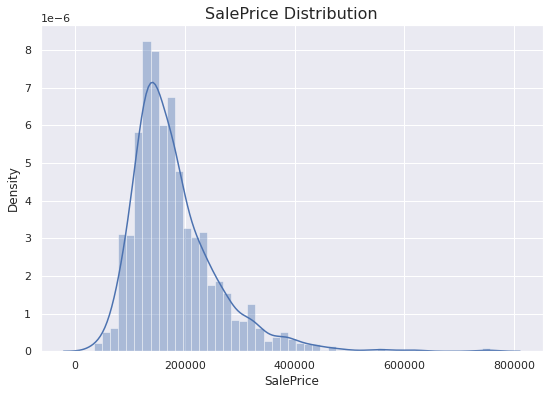

In [353]:
plt.figure(figsize = (9, 6))

sns.distplot(train['SalePrice'])

plt.title('SalePrice Distribution', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Density', fontsize=12)

In [354]:
from scipy import stats

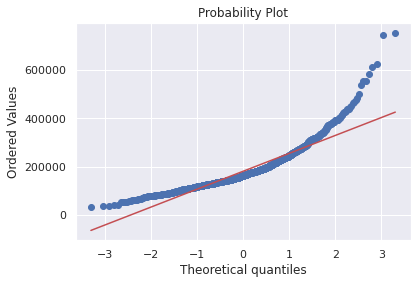

In [355]:
#QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. Since models love normally distributed data, we take the logarithm of our target variable

We have examples with atypically high cost, which can get in the way if our loss function is too sensitive to outliers.

Text(0, 0.5, 'Density')

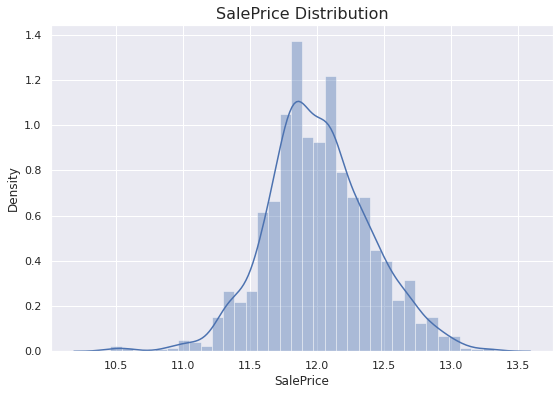

In [426]:
#applies log(1+x)
log_tagret = pd.DataFrame(np.log1p(train["SalePrice"]))

plt.figure(figsize = (9, 6))

sns.distplot(log_tagret['SalePrice'])

plt.title('SalePrice Distribution', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Density', fontsize=12)

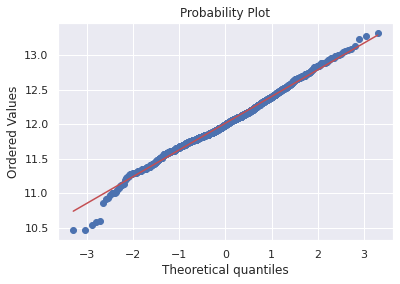

In [427]:
#QQ-plot
fig = plt.figure()
res = stats.probplot(log_tagret['SalePrice'], plot=plt)

it's more like a normal distribution

### Now let's check the correlation of the target value with numeric features.

In [358]:
numeric_data = train.select_dtypes([np.number])
numeric_features = numeric_data.columns

<Axes: >

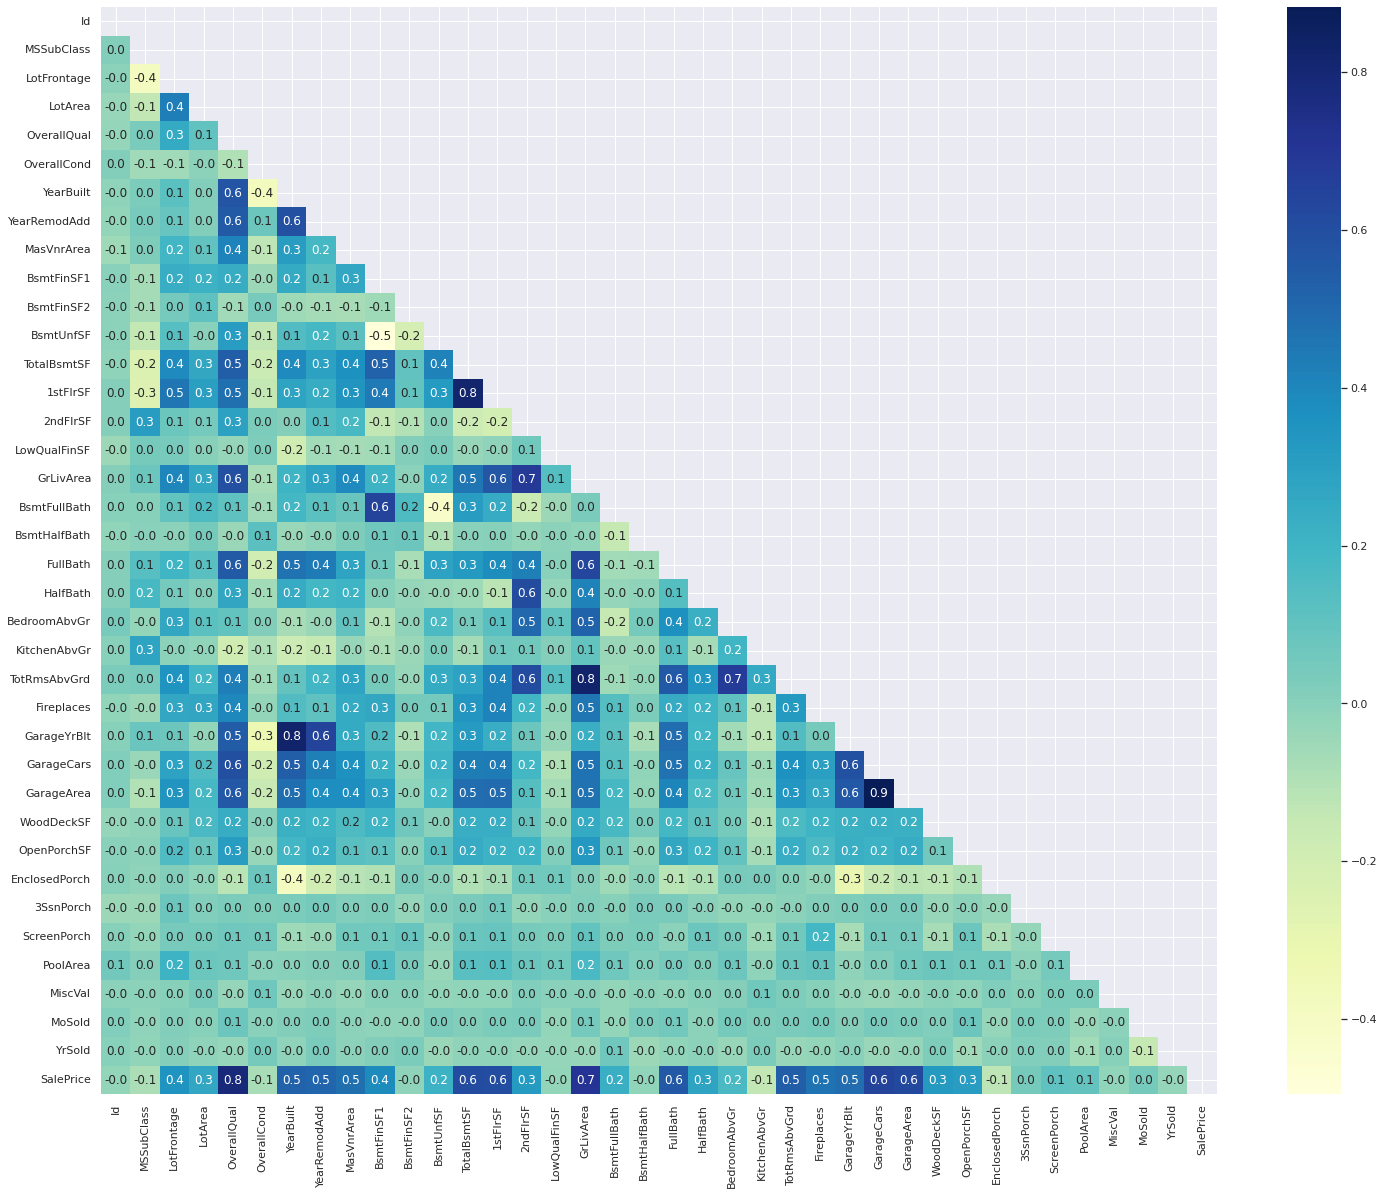

In [359]:
plt.figure(figsize = (25, 20))

mask = np.zeros_like(train[numeric_features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(train[numeric_features].corr(), mask=mask, annot=True, fmt=".1f", cmap='YlGnBu')

Looking at the last line we can see that quite a few values have a correlation greater than 0.5 with the target variable

In [360]:
len(numeric_features)

38

In [361]:
numeric_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [362]:
cols_to_del

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [363]:
temp = list(cols_to_del) + ['Id','SalePrice']

In [364]:
numeric_features = [el for el in numeric_features if el not in temp]
len(numeric_features)

36

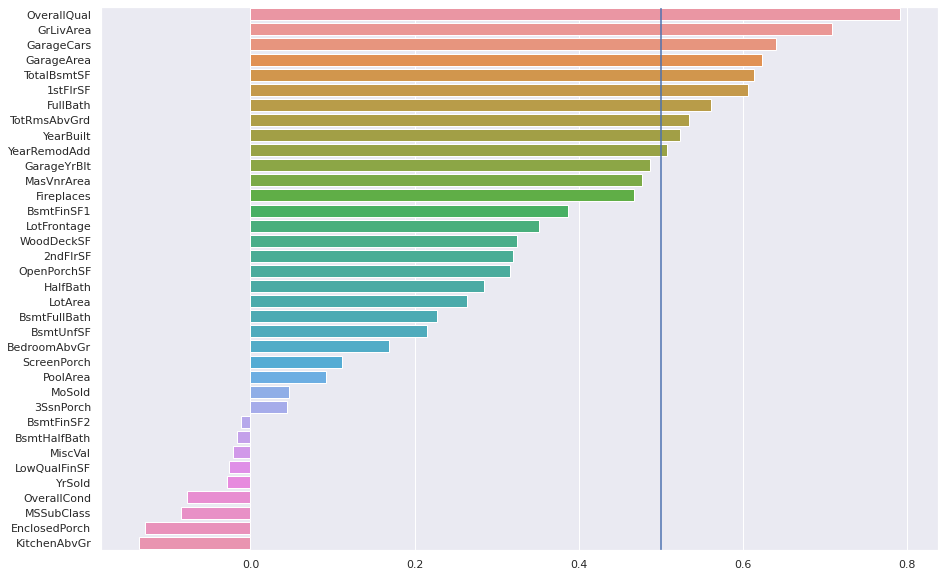

In [365]:
correlations = train[numeric_features].corrwith(train['SalePrice']).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plt.axvline(x = 0.5, color = 'b')        #treshold line - 0.5
plot.figure.set_size_inches(15, 10)

# Data preprocessing

## Handle missing values using techniques such as imputation or removal.

Columns to drop

In [366]:
cols_to_del = list(cols_to_del)+['Id']
cols_to_del

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id']

In [367]:
train.shape

(1460, 81)

In [368]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [369]:
train.drop(cols_to_del, axis=1, inplace=True)

In [370]:
train.shape

(1460, 75)

Columns to fill

In [371]:
cols_to_fill = train.columns[train.isnull().any()]
train.columns[train.isnull().any()], len(train.columns[train.isnull().any()])

(Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'GarageCond'],
       dtype='object'), 14)

In [372]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False)).rename(columns={0:'null_amount'}).head(14)

,null_amount
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtFinType2,38
BsmtExposure,38
BsmtQual,37
BsmtCond,37


In [373]:
train[cols_to_fill].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [374]:
train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'GarageCond']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


LotFrontage: Linear feet of street connected to property

MasVnrArea: Masonry veneer area in square feet

GarageYrBlt: Year garage was built

In [375]:
train[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
        'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
        'GarageCond']].head(10)

,LotFrontage,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
0,65.0,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
1,80.0,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
2,68.0,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
3,60.0,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
4,84.0,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA
5,85.0,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,1993.0,Unf,TA,TA
6,75.0,Stone,186.0,Ex,TA,Av,GLQ,Unf,SBrkr,Attchd,2004.0,RFn,TA,TA
7,NaN,Stone,240.0,Gd,TA,Mn,ALQ,BLQ,SBrkr,Attchd,1973.0,RFn,TA,TA
8,51.0,None,0.0,TA,TA,No,Unf,Unf,FuseF,Detchd,1931.0,Unf,Fa,TA
9,50.0,None,0.0,TA,TA,No,GLQ,Unf,SBrkr,Attchd,1939.0,RFn,Gd,TA


Fill in the categorical ones with the mode and the numeric ones with the median

In [376]:
for col in cols_to_fill:
    if col in ('LotFrontage', 'MasVnrArea', 'GarageYrBlt'):
        print(col, 'median is:', train[col].median())
        train[col] = train[col].fillna(train[col].median())
    else:
        train[col] = train[col].fillna(train[col].mode()[0])
        print(col, 'mode is:', train[col].mode()[0])    

LotFrontage median is: 69.0
MasVnrType mode is: None
MasVnrArea median is: 0.0
BsmtQual mode is: TA
BsmtCond mode is: TA
BsmtExposure mode is: No
BsmtFinType1 mode is: Unf
BsmtFinType2 mode is: Unf
Electrical mode is: SBrkr
GarageType mode is: Attchd
GarageYrBlt median is: 1980.0
GarageFinish mode is: Unf
GarageQual mode is: TA
GarageCond mode is: TA


Проверим что заполнили

In [377]:
pd.DataFrame(train.isnull().sum().sort_values(ascending=False)).rename(columns={0:'null_amount'}).head(14)

,null_amount
MSSubClass,0
GarageYrBlt,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
BedroomAbvGr,0
HalfBath,0
FullBath,0


## Check outliers

In [378]:
train.select_dtypes(include=np.number).head()       #data where only numeric features

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


are actually a category:
* MSSubClass
* OverallQual
* OverallCond

In [379]:
train.select_dtypes(include=np.number).columns      #Numeric cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Найдем выбросы на примере этой колонки

GrLivArea: Above grade (ground) living area square feet

Text(0.5, 0, 'GrLivArea')

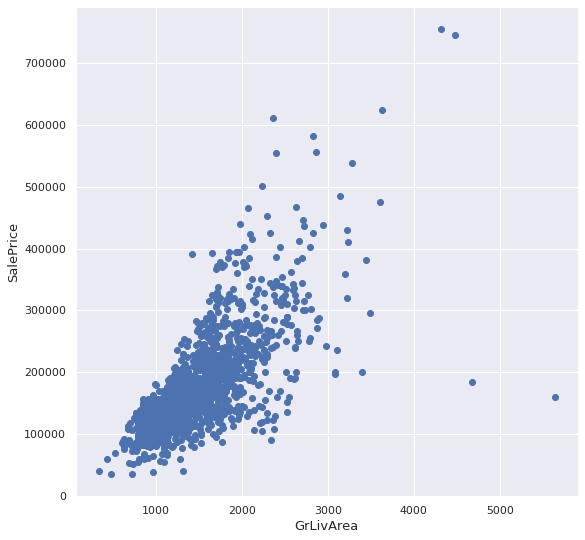

In [380]:
plt.figure(figsize = (9, 9))

plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)

In the lower right corner we see two clear outliers we can safely delete them.

In [381]:
index_to_del = train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index
train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


In [382]:
train.shape

(1460, 75)

In [383]:
train.drop(index_to_del, inplace=True)

In [384]:
train.shape

(1458, 75)

find more columns for which to check outliers based on train.describe()

After reviewing the description of each feature, we will select the most relevant and suspicious for the analysis of outliers

In [385]:
cols_for_outliers_analysis = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'MiscVal', 'GarageArea']

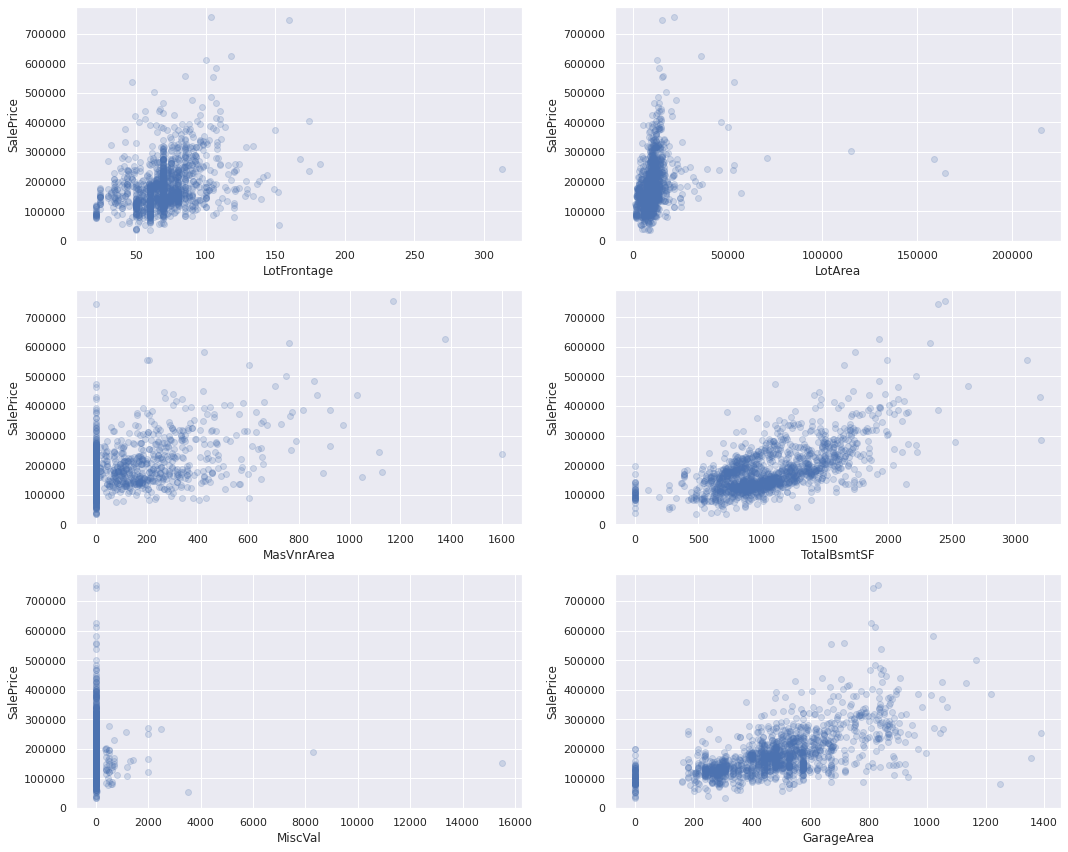

In [386]:
fig, axs = plt.subplots(figsize=(15, 12), nrows=3, ncols=2)
for ax, feature in zip(axs.ravel(), cols_for_outliers_analysis):
    ax.scatter(train[feature], train['SalePrice'], alpha=0.2)
    ax.set_xlabel(feature)
    ax.set_ylabel("SalePrice")
plt.tight_layout()

In [387]:
train.shape

(1458, 75)

In [388]:
# LotFrontage - Linear feet of street connected to property
index_to_del = train[(train['LotFrontage']>150)].index
train.drop(index_to_del, inplace=True)
len(index_to_del)

8

In [389]:
# LotArea - Lot size in square feet
index_to_del = train[(train['LotArea']>50000)].index
train.drop(index_to_del, inplace=True)
len(index_to_del)

10

In [390]:
# MasVnrArea - Masonry veneer area in square feet
index_to_del = train[(train['MasVnrArea']>1150)].index
train.drop(index_to_del, inplace=True)
len(index_to_del)

3

In [391]:
# TotalBsmtSF - Total square feet of basement area
index_to_del = train[(train['TotalBsmtSF']>3000)].index
train.drop(index_to_del, inplace=True)
len(index_to_del)

3

In [392]:
# GarageArea
index_to_del = train[(train['GarageArea']>1200)].index
train.drop(index_to_del, inplace=True)
len(index_to_del)

4

In [393]:
# MiscVal
index_to_del = train[(train['MiscVal']>2400)].index
train.drop(index_to_del, inplace=True)
len(index_to_del)

4

In [394]:
train.shape

(1426, 75)

Text(0, 0.5, 'Density')

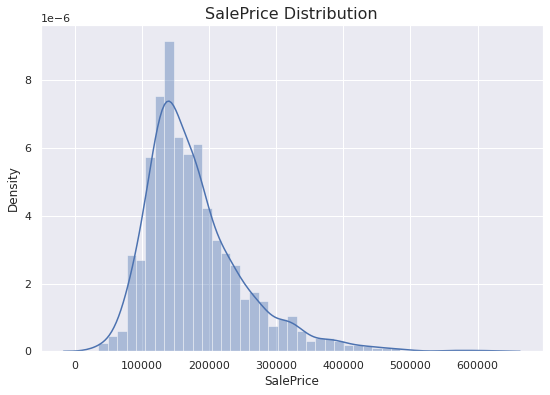

In [395]:
plt.figure(figsize = (9, 6))

sns.distplot(train['SalePrice'])

plt.title('SalePrice Distribution', fontsize=16)
plt.xlabel('SalePrice', fontsize=12)
plt.ylabel('Density', fontsize=12)

## Split the dataset

In [396]:
train.select_dtypes(include=np.number).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [397]:
numeric_col = list(train.select_dtypes(include=np.number).columns).copy()
numeric_col.remove('MSSubClass')
numeric_col.remove('OverallQual')
numeric_col.remove('OverallCond')
numeric_col.remove('SalePrice')

In [398]:
len(numeric_col)

33

In [399]:
categorical_col = list(set(train.columns)-set(numeric_col)-set(['SalePrice']))

In [400]:
len(categorical_col)

41

In [401]:
train.columns, len(train.columns)

(Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
        'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
        'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
        'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
        'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
        'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
        'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
        'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
        'WoodDeckSF',

In [402]:
y = train["SalePrice"]
X = train.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [403]:
X_train.shape

(998, 74)

In [404]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1106,20,RL,114.0,10357,Pave,IR1,Lvl,AllPub,Corner,Gtl,SawyerW,Feedr,Norm,1Fam,1Story,7,5,1990,1991,Hip,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,738,Unf,0,172,910,GasA,Gd,Y,SBrkr,1442,0,0,1442,1,0,2,0,3,1,Gd,6,Typ,1,Attchd,1990.0,Fin,2,719,TA,TA,Y,0,244,0,0,0,0,0,5,2007,WD,Normal
1445,85,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,6,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,LwQ,187,Rec,627,0,814,GasA,Gd,Y,SBrkr,913,0,0,913,1,0,1,0,3,1,TA,6,Typ,0,Detchd,1990.0,Unf,1,240,TA,TA,Y,0,0,252,0,0,0,0,5,2007,WD,Normal
1272,20,RL,69.0,13526,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1965,1965,Hip,CompShg,HdBoard,Plywood,BrkFace,114.0,TA,TA,CBlock,TA,TA,No,BLQ,560,LwQ,375,0,935,GasA,TA,Y,SBrkr,935,0,0,935,1,0,1,0,3,1,TA,5,Typ,0,Attchd,1965.0,Unf,1,288,TA,TA,Y,180,0,0,0,0,0,0,11,2006,WD,Normal
979,20,RL,80.0,8816,Pave,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1963,1963,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Rec,651,Unf,0,470,1121,GasA,TA,Y,SBrkr,1121,0,0,1121,1,0,1,0,3,1,TA,5,Typ,0,Detchd,1963.0,Unf,2,480,TA,TA,Y,0,80,0,0,0,0,0,6,2009,WD,Normal
810,20,RL,78.0,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99.0,TA,TA,CBlock,TA,TA,No,ALQ,663,LwQ,377,0,1040,GasA,Fa,Y,SBrkr,1309,0,0,1309,1,0,1,1,3,1,Gd,5,Typ,1,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,0,1,2006,WD,Normal


In [474]:
y_train.shape

(998,)

In [406]:
pd.DataFrame(y_train.head())

,SalePrice
1106,179900
1445,129000
1272,137000
979,139000
810,181000


## Perform feature scaling

We encode categorical features through OHE, which of course will lead to a large number of features, but we will continue to use Lasso regression, which sparse the feature space, in other words, nullify some of the weights.
Or Ridge regression which will reduce these weights

In [407]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_col),
    ('scaling', StandardScaler(), numeric_col)
    ], remainder='passthrough')

## Model training and evaluation (cross validation)

In [408]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor

### Lasso

In [409]:
pipeline_lasso = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

In [410]:
lasso = pipeline_lasso.fit(X_train, y_train)

In [411]:
lasso.steps

[('ohe_and_scaling', ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse=False),
                                   ['BsmtFinType1', 'PavedDrive', 'BsmtCond',
                                    'RoofStyle', 'Exterior2nd', 'GarageQual',
                                    'OverallCond', 'GarageFinish', 'BsmtFinType2',
                                    'LandContour', 'Condition2', 'Utilities',
                                    'Condition1', 'SaleType', 'KitchenQual',
                                    'HouseStyle', 'Exterior1st', 'RoofMat...
                                    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                    'GrLivArea', 'B

In [412]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (998, 74)
Size after OneHot: (998, 294)


In [413]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = lasso.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test R-squared = %.4f" % r2_score(y_test, y_pred))

Test MSE = 466093033.8404
Test RMSE = 21589.1879
Test R-squared = 0.9167


**Compare with the baseline where baseline is the average for SellPrice**

In [482]:
y_pred_base = pd.Series(y_test.mean(), index=y_test.index)

In [483]:
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred_base, squared=True))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred_base, squared=False))
print("Test R-squared = %.4f" % r2_score(y_test, y_pred_base))

Test MSE = 5596439713.0295
Test RMSE = 74809.3558
Test R-squared = 0.0000


**Cross validation**

In [414]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -25823.1910
	-24349.2157
	-30638.9009
	-21663.2675
	-20815.3320
Mean CV RMSE = 24657.9814


### Random Forest

In [415]:
pipeline_rf = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', RandomForestRegressor(random_state=11))
])

In [416]:
rf = pipeline_rf.fit(X_train, y_train)

In [417]:
rf.steps

[('ohe_and_scaling', ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse=False),
                                   ['BsmtFinType1', 'PavedDrive', 'BsmtCond',
                                    'RoofStyle', 'Exterior2nd', 'GarageQual',
                                    'OverallCond', 'GarageFinish', 'BsmtFinType2',
                                    'LandContour', 'Condition2', 'Utilities',
                                    'Condition1', 'SaleType', 'KitchenQual',
                                    'HouseStyle', 'Exterior1st', 'RoofMat...
                                    'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                    'GrLivArea', 'B

In [418]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (998, 74)
Size after OneHot: (998, 294)


In [419]:
y_pred = rf.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test R-squared = %.4f" % r2_score(y_test, y_pred))

Test MSE = 637228836.4376
Test RMSE = 25243.3919
Test R-squared = 0.8861


### Ridge

In [420]:
pipeline_ridge = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

In [421]:
ridge = pipeline_ridge.fit(X_train, y_train)

In [422]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = ridge.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test R-squared = %.4f" % r2_score(y_test, y_pred))

Test MSE = 444245929.7796
Test RMSE = 21077.1424
Test R-squared = 0.9206


**Cross validation**

In [423]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -22732.9571
	-23638.5461
	-29408.3570
	-19848.9427
	-19457.4958
Mean CV RMSE = 23017.2598


### Ridge with log target

In [429]:
log_tagret = pd.DataFrame(np.log1p(train["SalePrice"]))

In [430]:
y = log_tagret["SalePrice"]
X = train.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [431]:
pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

In [432]:
model = pipeline.fit(X_train, y_train)

In [433]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


y_pred = model.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Test RMSE = %.4f" % np.expm1(mean_squared_error(y_test, y_pred, squared=False)))
print("Test R-squared = %.4f" % r2_score(y_test, y_pred))

Test MSE = 0.0165
Test RMSE = 0.1372
Test R-squared = 0.8880


We see that the score did not improve from the use of a logarithmic target

# Model tuning (Grid Search)

## Ridge tuning

In [434]:
from sklearn.model_selection import GridSearchCV

In [435]:
alphas = np.logspace(-2, 4, 20)

In [436]:
alphas

array([1.00000000e-02, 2.06913808e-02, 4.28133240e-02, 8.85866790e-02,
       1.83298071e-01, 3.79269019e-01, 7.84759970e-01, 1.62377674e+00,
       3.35981829e+00, 6.95192796e+00, 1.43844989e+01, 2.97635144e+01,
       6.15848211e+01, 1.27427499e+02, 2.63665090e+02, 5.45559478e+02,
       1.12883789e+03, 2.33572147e+03, 4.83293024e+03, 1.00000000e+04])

In [437]:
y = train["SalePrice"]
X = train.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [439]:
%%time
searcher = GridSearchCV(pipeline_ridge, [{"regression__alpha": alphas}],
                        scoring="neg_root_mean_squared_error", cv=10, n_jobs=-1)

searcher.fit(X_train, y_train)

CPU times: user 725 ms, sys: 76.8 ms, total: 801 ms
Wall time: 9.44 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('ohe_and_scaling',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['BsmtFinType1',
                                                                          'PavedDrive',
                                                                          'BsmtCond',
                                                                          'RoofStyle',
                                                                          'Exterior2nd',
                                                                          'GarageQual',
                                                                          'OverallCond',
                                                                          'GarageFinish',
                                                                          'BsmtFinType2',
                                                                          'LandContour',
                                                                          'Condition2',
                                                                          'Utilities',
                                                                          'Conditio...
             param_grid=[{'regression__alpha': array([1.00000000e-02, 2.06913808e-02, 4.28133240e-02, 8.85866790e-02,
       1.83298071e-01, 3.79269019e-01, 7.84759970e-01, 1.62377674e+00,
       3.35981829e+00, 6.95192796e+00, 1.43844989e+01, 2.97635144e+01,
       6.15848211e+01, 1.27427499e+02, 2.63665090e+02, 5.45559478e+02,
       1.12883789e+03, 2.33572147e+03, 4.83293024e+03, 1.00000000e+04])}],
             scoring='neg_root_mean_squared_error')

Best alpha = 6.9519


Text(0, 0.5, 'CV score')

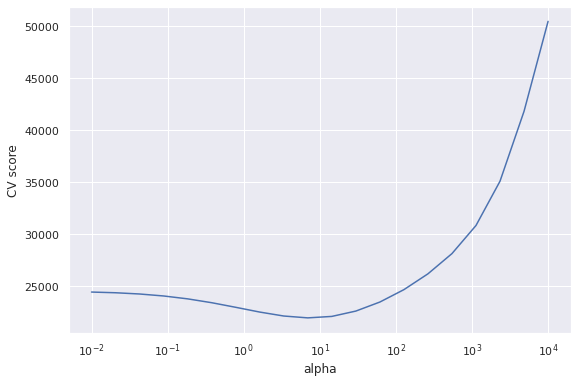

In [441]:
best_alpha = searcher.best_params_["regression__alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.figure(figsize = (9, 6))
plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [442]:
pipeline_ridge_best_alpha = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge(best_alpha))
])

In [443]:
ridge = pipeline_ridge_best_alpha.fit(X_train, y_train)

In [446]:
y_pred = ridge.predict(X_test)
print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
print("Test R-squared = %.4f" % r2_score(y_test, y_pred))
print()
cv_scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Test MSE = 433788152.7601
Test RMSE = 20827.5815
Test R-squared = 0.9225

Cross validation scores:
	 -21175.6767
	-23567.6797
	-28845.7295
	-19100.0627
	-18497.0096
Mean CV RMSE = 22237.2316


**See a slight increase**

## Coefficients importance



In [456]:
coef = ridge.named_steps["regression"].coef_
len(ridge.named_steps["regression"].coef_)  #coefs

294

In [457]:
feature_names = ridge.named_steps["ohe_and_scaling"].get_feature_names_out()
len(ridge.named_steps["ohe_and_scaling"].get_feature_names_out())

294

In [458]:
temp = pd.Series(coef, index = feature_names)
temp.head()

ohe__BsmtFinType1_ALQ   -2173.087739
ohe__BsmtFinType1_BLQ    1557.377879
ohe__BsmtFinType1_GLQ    7203.352728
ohe__BsmtFinType1_LwQ   -5000.422592
ohe__BsmtFinType1_Rec   -3200.038304
dtype: float64

In [460]:
imp_coef = pd.concat([temp.sort_values().head(10),
                     temp.sort_values().tail(10)])

Text(0.5, 1.0, '10 Head/Tail coefficients of our Ridge model')

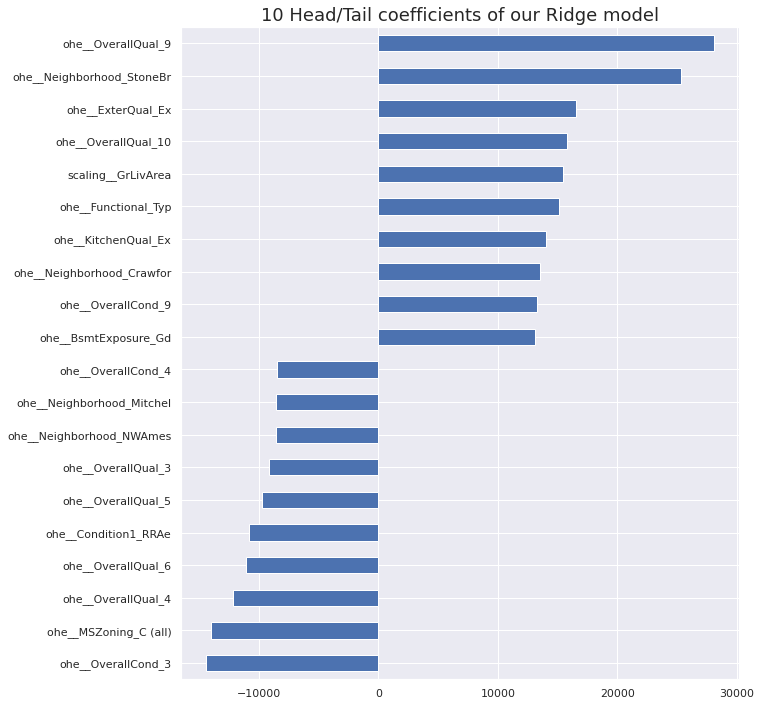

In [466]:
plt.rcParams['figure.figsize'] = (10.0, 12.0)
imp_coef.plot(kind="barh")

plt.title("10 Head/Tail coefficients of our Ridge model", fontsize=18)

# Visualize the relationship between actual and predicted prices

Text(0.5, 1.0, 'Actual vs Predicted Prices (Ridge Regression)')

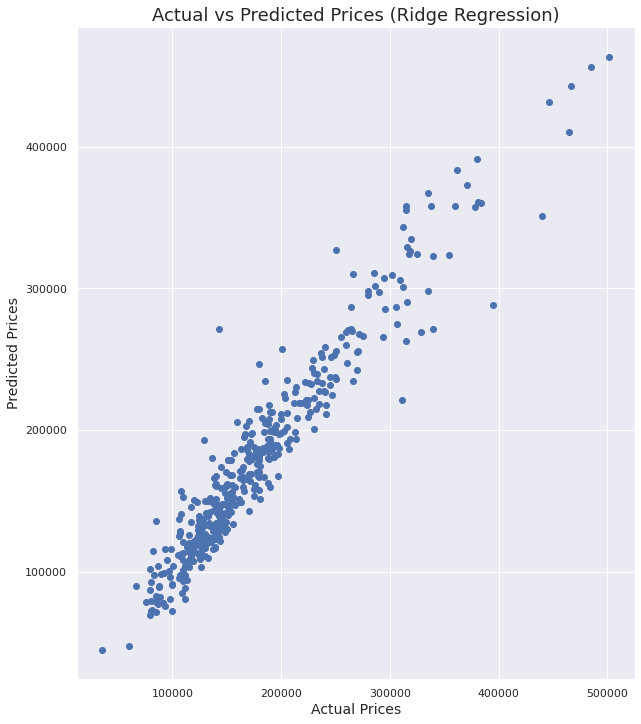

In [485]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices', fontsize=14)
plt.ylabel('Predicted Prices', fontsize=14)
plt.title('Actual vs Predicted Prices (Ridge Regression)', fontsize=18)

# Conclusion

We see that our models have a pretty good ability to generalize the data

We went through all the necessary steps: we analyzed the data, cleaned it, filled in the missing data, built several models, improved them, among which the best was Ridge regression with a R-squared value of 0.92


Also got a graph that shows the most influential attributes of our dataset.